<a href="https://colab.research.google.com/github/xpertdesh/ml-class21/blob/main/projects/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Project

To get started, I read an article about CIFAR-10. CIFAR is an acronym that stands for the Canadian Institute For Advanced Research. The datasets were developed by researchers at the institute.

CIFAR-10 contains the following:
* 60,000 32 x 32 color images
* 10 classes
* 6,000 images per class
* 50,000 for training
* 10,000 for testing

One problem that we might face, is that the images are too small but we're going to find out soon.

In [10]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import optimizers
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


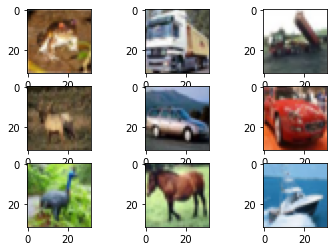

In [ ]:
(trainX, trainy), (testX, testy) = cifar10.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(trainX[i])
plt.show()

We load the dataset from keras, and we see that it has all characteristics that I mentioned previously. Train and test dataset are in good shape. The pictures seem small given the low resolution compared to normal photographs. Let's continue

## Basic Model Evaluation

I decided to create a basic model evaluation using CNN to see where the accuracy stands and how to improve it. I used the following 5 key elements:
* loading the dataset
* preprocessing the data
* assigninment of model
* evaluation of model
* showing results

This method will be useful as it will allow me to tweak different configurations and help me visualize it.

I will also perform some evaluations with different optimizers to see which one I prefer.

170500096/170498071 [==============================] - 4s 0us/step
Epoch 1/100
625/625 [==============================] - 36s 5ms/step - loss: 2.1453 - accuracy: 0.2210 - val_loss: 1.8019 - val_accuracy: 0.3388
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7568 - accuracy: 0.3642 - val_loss: 1.6370 - val_accuracy: 0.4083
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6055 - accuracy: 0.4234 - val_loss: 1.5367 - val_accuracy: 0.4572
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 1.5245 - accuracy: 0.4485 - val_loss: 1.4612 - val_accuracy: 0.4735
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 1.4463 - accuracy: 0.4813 - val_loss: 1.4320 - val_accuracy: 0.4830
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 1.3978 - accuracy: 0.5036 - val_loss: 1.3715 - val_accuracy: 0.5148
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss:

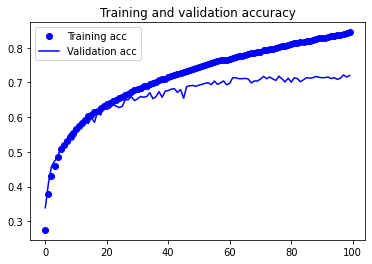

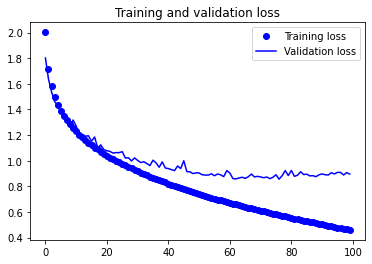

In [ ]:
# Same model we used in the CCN lab for the MNIST dataset
def load_dataset():
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


def preprocess(train, test):
	train_norm = train.astype('float32') / 255
	test_norm = test.astype('float32') / 255
	return train_norm, test_norm


def define_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


def run_model():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = preprocess(trainX, testX)
	model = define_model()
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_split=0.2)
	test_loss, test_acc = model.evaluate(testX, testY)
	print('> %.3f' % (test_acc * 100.0))
	summarize_diagnostics(history) 


run_model()

This is really impressive for its first run.

We get 84.61% for the training accuracy.

We get 72.01% for the validation accuracy.

##**We get 71.61% for the test accuracy.**

We can see it starts overfitting around the 28th epoch with ~65% accuracy.

Epoch 1/100
625/625 [==============================] - 4s 5ms/step - loss: 2.2083 - accuracy: 0.2003 - val_loss: 1.8837 - val_accuracy: 0.3249
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 1.8393 - accuracy: 0.3350 - val_loss: 1.7286 - val_accuracy: 0.3751
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6976 - accuracy: 0.3878 - val_loss: 1.6195 - val_accuracy: 0.4173
Epoch 4/100
625/625 [==============================] - 3s 4ms/step - loss: 1.6028 - accuracy: 0.4230 - val_loss: 1.5747 - val_accuracy: 0.4278
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 1.5359 - accuracy: 0.4488 - val_loss: 1.5179 - val_accuracy: 0.4543
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 1.4789 - accuracy: 0.4688 - val_loss: 1.4546 - val_accuracy: 0.4762
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 1.4442 - accuracy: 0.4828 - val_loss: 1.4270 - val_accuracy: 0.4848

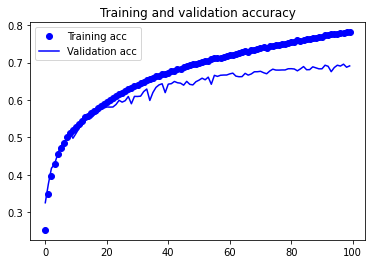

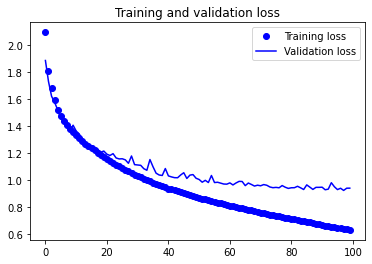

In [ ]:
# Same model as before but just adding a pooling layer at the end
def load_dataset():
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


def preprocess(train, test):
	train_norm = train.astype('float32') / 255
	test_norm = test.astype('float32') / 255
	return train_norm, test_norm


def define_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


def summarize_diagnostics(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()


def run_model():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = preprocess(trainX, testX)
	model = define_model()
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_split=0.2)
	test_loss, test_acc = model.evaluate(testX, testY)
	print('> %.3f' % (test_acc * 100.0))
	summarize_diagnostics(history) 


run_model()

We get 78.14% for the training accuracy.

We get 69.11% for the validation accuracy.

##**We get 69.44% for the test accuracy.**

Did not improve.

Epoch 1/100
625/625 [==============================] - 5s 6ms/step - loss: 2.0344 - accuracy: 0.2579 - val_loss: 1.6414 - val_accuracy: 0.4182
Epoch 2/100
625/625 [==============================] - 4s 6ms/step - loss: 1.6101 - accuracy: 0.4225 - val_loss: 1.4841 - val_accuracy: 0.4627
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 1.4787 - accuracy: 0.4613 - val_loss: 1.4341 - val_accuracy: 0.4909
Epoch 4/100
625/625 [==============================] - 4s 6ms/step - loss: 1.3707 - accuracy: 0.5041 - val_loss: 1.3111 - val_accuracy: 0.5355
Epoch 5/100
625/625 [==============================] - 4s 6ms/step - loss: 1.2920 - accuracy: 0.5407 - val_loss: 1.2986 - val_accuracy: 0.5410
Epoch 6/100
625/625 [==============================] - 4s 6ms/step - loss: 1.2351 - accuracy: 0.5604 - val_loss: 1.2258 - val_accuracy: 0.5708
Epoch 7/100
625/625 [==============================] - 4s 6ms/step - loss: 1.1654 - accuracy: 0.5872 - val_loss: 1.2100 - val_accuracy: 0.5638

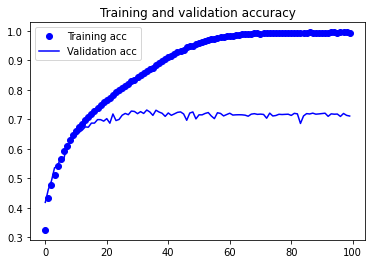

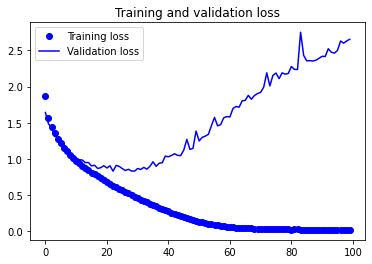

In [ ]:
# Model used for the dog/cat dataset
def load_dataset():
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


def preprocess(train, test):
	train_norm = train.astype('float32') / 255
	test_norm = test.astype('float32') / 255
	return train_norm, test_norm


def define_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


def summarize_diagnostics(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()


def run_model():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = preprocess(trainX, testX)
	model = define_model()
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_split=0.2)
	test_loss, test_acc = model.evaluate(testX, testY)
	print('> %.3f' % (test_acc * 100.0))
	summarize_diagnostics(history) 


run_model()

We get 99.45%% for the training accuracy.

We get 71.11% for the validation accuracy.

##**We get 70.80% for the test accuracy.**

Did not improve either. However, the training accuracy reached almost a perfect score.

Epoch 1/100
625/625 [==============================] - 7s 9ms/step - loss: 1.9990 - accuracy: 0.2751 - val_loss: 1.6301 - val_accuracy: 0.4116
Epoch 2/100
625/625 [==============================] - 5s 8ms/step - loss: 1.6040 - accuracy: 0.4190 - val_loss: 1.4984 - val_accuracy: 0.4655
Epoch 3/100
625/625 [==============================] - 5s 9ms/step - loss: 1.4490 - accuracy: 0.4772 - val_loss: 1.3565 - val_accuracy: 0.5125
Epoch 4/100
625/625 [==============================] - 5s 9ms/step - loss: 1.3325 - accuracy: 0.5274 - val_loss: 1.2753 - val_accuracy: 0.5453
Epoch 5/100
625/625 [==============================] - 5s 9ms/step - loss: 1.2396 - accuracy: 0.5583 - val_loss: 1.1900 - val_accuracy: 0.5728
Epoch 6/100
625/625 [==============================] - 5s 8ms/step - loss: 1.1562 - accuracy: 0.5915 - val_loss: 1.1391 - val_accuracy: 0.5953
Epoch 7/100
625/625 [==============================] - 5s 8ms/step - loss: 1.0919 - accuracy: 0.6159 - val_loss: 1.0969 - val_accuracy: 0.6184

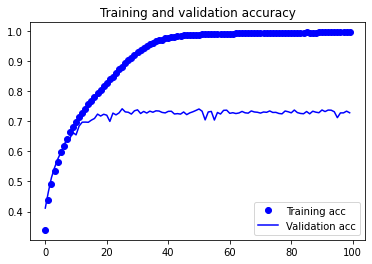

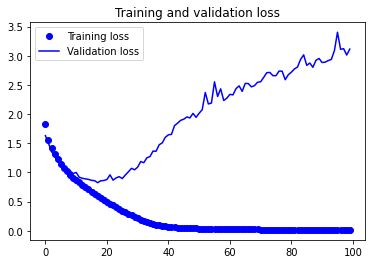

In [ ]:
# Model with 2 convoluted layers on top of each other
# Also, making the Dense layer have the same filters as Conv2D
# Making the last Conv2D different from the previous one
def load_dataset():
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


def preprocess(train, test):
	train_norm = train.astype('float32') / 255
	test_norm = test.astype('float32') / 255
	return train_norm, test_norm


def define_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


def summarize_diagnostics(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()


def run_model():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = preprocess(trainX, testX)
	model = define_model()
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_split=0.2)
	test_loss, test_acc = model.evaluate(testX, testY)
	print('> %.3f' % (test_acc * 100.0))
	summarize_diagnostics(history) 


run_model()

We get 99.48%% for the training accuracy.

We get 72.79% for the validation accuracy.

##**We get 71.68% for the test accuracy.**

Slight improvement.

These are the results from the 4 CNN's:
* The one used for MNIST dataset: 71.61%
* Same one but addedd a pooling layer: 69.19%
* The one used for dog/cat dataset: 70.60%
* My own variation of the last one: 71.68%

For the last 2 CNN's I had to use padding because the input was too small. Padding allows for adds pixel to an image when it's being processed. They all overfit around the same mark reaching similar accuracy. One way to combat that is to use data augmentation. Before we do that, I will test different optimizers that I've encountered for this class, such as: Adam, and SGD(stochastic gradient descent).

I will use the best two models and train them with the optimizers that I just mentioned. I don't have much experience with optimizers but I have time to experiment. I will use the first and last model.

Epoch 1/100
625/625 [==============================] - 6s 8ms/step - loss: 2.3042 - accuracy: 0.0982 - val_loss: 2.3011 - val_accuracy: 0.1066
Epoch 2/100
625/625 [==============================] - 5s 8ms/step - loss: 2.3006 - accuracy: 0.1083 - val_loss: 2.2986 - val_accuracy: 0.1217
Epoch 3/100
625/625 [==============================] - 5s 8ms/step - loss: 2.2982 - accuracy: 0.1329 - val_loss: 2.2960 - val_accuracy: 0.1534
Epoch 4/100
625/625 [==============================] - 5s 8ms/step - loss: 2.2954 - accuracy: 0.1688 - val_loss: 2.2920 - val_accuracy: 0.1848
Epoch 5/100
625/625 [==============================] - 5s 8ms/step - loss: 2.2911 - accuracy: 0.1840 - val_loss: 2.2855 - val_accuracy: 0.2041
Epoch 6/100
625/625 [==============================] - 5s 8ms/step - loss: 2.2832 - accuracy: 0.1993 - val_loss: 2.2721 - val_accuracy: 0.2045
Epoch 7/100
625/625 [==============================] - 5s 8ms/step - loss: 2.2664 - accuracy: 0.1987 - val_loss: 2.2386 - val_accuracy: 0.2103

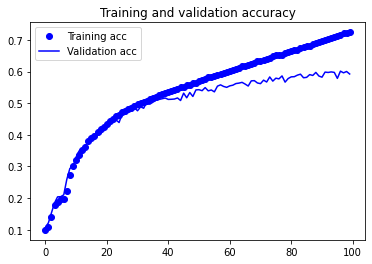

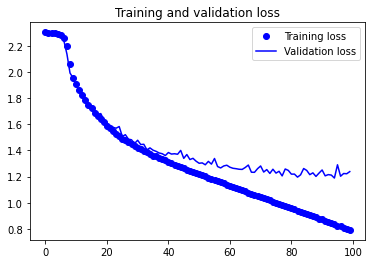

In [ ]:
# SGD Optimizer on 4th model
def load_dataset():
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


def preprocess(train, test):
	train_norm = train.astype('float32') / 255
	test_norm = test.astype('float32') / 255
	return train_norm, test_norm


def define_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.SGD(lr=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


def summarize_diagnostics(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()


def run_model():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = preprocess(trainX, testX)
	model = define_model()
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_split=0.2)
	test_loss, test_acc = model.evaluate(testX, testY)
	print('> %.3f' % (test_acc * 100.0))
	summarize_diagnostics(history) 


run_model()

##59.19% on the test data. Overfits a little but the score is poor.

Epoch 1/100
625/625 [==============================] - 3s 5ms/step - loss: 2.3046 - accuracy: 0.0836 - val_loss: 2.2961 - val_accuracy: 0.1194
Epoch 2/100
625/625 [==============================] - 3s 4ms/step - loss: 2.2945 - accuracy: 0.1374 - val_loss: 2.2874 - val_accuracy: 0.1694
Epoch 3/100
625/625 [==============================] - 3s 4ms/step - loss: 2.2856 - accuracy: 0.1627 - val_loss: 2.2765 - val_accuracy: 0.1944
Epoch 4/100
625/625 [==============================] - 3s 4ms/step - loss: 2.2733 - accuracy: 0.1954 - val_loss: 2.2576 - val_accuracy: 0.2180
Epoch 5/100
625/625 [==============================] - 3s 4ms/step - loss: 2.2521 - accuracy: 0.2195 - val_loss: 2.2262 - val_accuracy: 0.2251
Epoch 6/100
625/625 [==============================] - 3s 4ms/step - loss: 2.2168 - accuracy: 0.2321 - val_loss: 2.1735 - val_accuracy: 0.2394
Epoch 7/100
625/625 [==============================] - 3s 4ms/step - loss: 2.1568 - accuracy: 0.2450 - val_loss: 2.1031 - val_accuracy: 0.2485

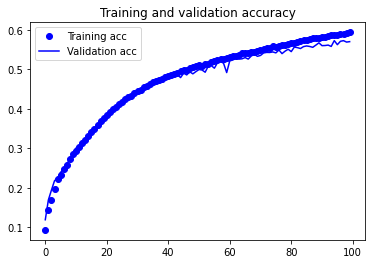

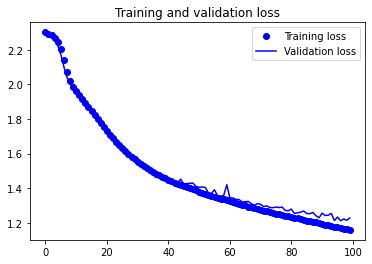

In [ ]:
# SGD optimizer on 1st model
def load_dataset():
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


def preprocess(train, test):
	train_norm = train.astype('float32') / 255
	test_norm = test.astype('float32') / 255
	return train_norm, test_norm


def define_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.SGD(lr=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


def run_model():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = preprocess(trainX, testX)
	model = define_model()
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_split=0.2)
	test_loss, test_acc = model.evaluate(testX, testY)
	print('> %.3f' % (test_acc * 100.0))
	summarize_diagnostics(history) 


run_model()

##56.99% on the test data. There's no overfitting but the score is very poor.

Epoch 1/100
625/625 [==============================] - 6s 8ms/step - loss: 1.8897 - accuracy: 0.2884 - val_loss: 1.2206 - val_accuracy: 0.5566
Epoch 2/100
625/625 [==============================] - 5s 8ms/step - loss: 1.1037 - accuracy: 0.6080 - val_loss: 0.9338 - val_accuracy: 0.6732
Epoch 3/100
625/625 [==============================] - 5s 8ms/step - loss: 0.8566 - accuracy: 0.6996 - val_loss: 0.8225 - val_accuracy: 0.7175
Epoch 4/100
625/625 [==============================] - 5s 8ms/step - loss: 0.6845 - accuracy: 0.7617 - val_loss: 0.7735 - val_accuracy: 0.7337
Epoch 5/100
625/625 [==============================] - 5s 8ms/step - loss: 0.5677 - accuracy: 0.7959 - val_loss: 0.7304 - val_accuracy: 0.7511
Epoch 6/100
625/625 [==============================] - 5s 8ms/step - loss: 0.4613 - accuracy: 0.8382 - val_loss: 0.7306 - val_accuracy: 0.7577
Epoch 7/100
625/625 [==============================] - 5s 8ms/step - loss: 0.3666 - accuracy: 0.8721 - val_loss: 0.8584 - val_accuracy: 0.7257

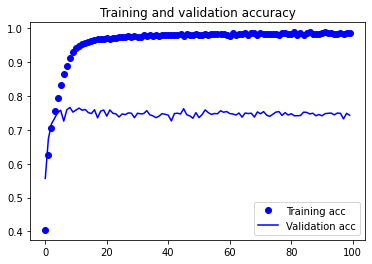

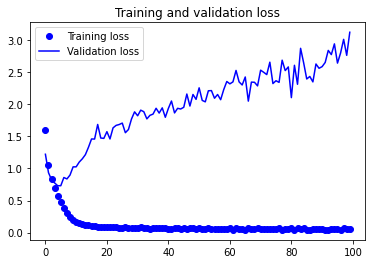

In [ ]:
# Adam Optimizer on 4th model, we're going to leave Adam default
def load_dataset():
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


def preprocess(train, test):
	train_norm = train.astype('float32') / 255
	test_norm = test.astype('float32') / 255
	return train_norm, test_norm


def define_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


def summarize_diagnostics(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()


def run_model():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = preprocess(trainX, testX)
	model = define_model()
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_split=0.2)
	test_loss, test_acc = model.evaluate(testX, testY)
	print('> %.3f' % (test_acc * 100.0))
	summarize_diagnostics(history) 


run_model()

##72.78% accuracy on test data.
Major overfitting but shows learning potential at least. Best score so far. Curiously, the validation loss seems to increase, whereas the validation accuracy settles.

Epoch 1/100
625/625 [==============================] - 3s 5ms/step - loss: 1.8429 - accuracy: 0.3182 - val_loss: 1.3852 - val_accuracy: 0.5030
Epoch 2/100
625/625 [==============================] - 3s 4ms/step - loss: 1.2914 - accuracy: 0.5401 - val_loss: 1.1494 - val_accuracy: 0.5959
Epoch 3/100
625/625 [==============================] - 3s 4ms/step - loss: 1.1150 - accuracy: 0.6008 - val_loss: 1.1562 - val_accuracy: 0.6008
Epoch 4/100
625/625 [==============================] - 3s 4ms/step - loss: 1.0100 - accuracy: 0.6447 - val_loss: 0.9795 - val_accuracy: 0.6645
Epoch 5/100
625/625 [==============================] - 3s 4ms/step - loss: 0.9220 - accuracy: 0.6771 - val_loss: 0.9687 - val_accuracy: 0.6662
Epoch 6/100
625/625 [==============================] - 3s 4ms/step - loss: 0.8503 - accuracy: 0.7008 - val_loss: 0.9513 - val_accuracy: 0.6701
Epoch 7/100
625/625 [==============================] - 3s 4ms/step - loss: 0.8038 - accuracy: 0.7190 - val_loss: 0.9134 - val_accuracy: 0.6841

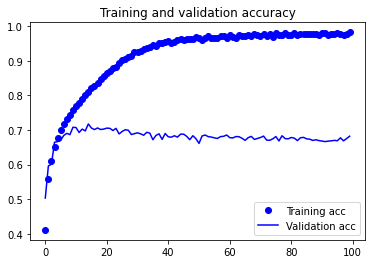

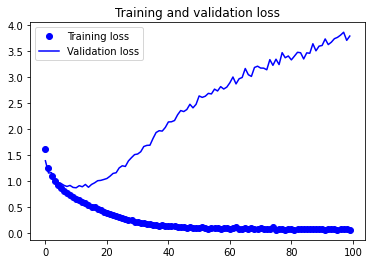

In [ ]:
# Adam optimizer on 1st model, we're going to leave Adam default
def load_dataset():
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


def preprocess(train, test):
	train_norm = train.astype('float32') / 255
	test_norm = test.astype('float32') / 255
	return train_norm, test_norm


def define_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


def run_model():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = preprocess(trainX, testX)
	model = define_model()
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_split=0.2)
	test_loss, test_acc = model.evaluate(testX, testY)
	print('> %.3f' % (test_acc * 100.0))
	summarize_diagnostics(history) 


run_model()

##67.47% on test data.
Same overfitting pattern as last model but the accuracy is very poor.
<br><br>

Again, I was just testing out different optimizers that I've encountered when doing different labs and projects. Adam did better than RMSprop. So, I will stick to the 4th model with Adam optimizer(default) when improving my model.
<br><br><br>
 # Data Augmentation
 One way to solve the overfitting problem is to use data augmentation. Data augmentation generates more training data from existing training samples, by augmenting the samples that yield believable-looking images. Since the dataset is comprised of small photos with low resolution, we don't want to distort the images too much.

```
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(trainX, trainy, batch_size=64)
```

fit model
```
steps = int(trainX.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_split=0.2)
```

These are the lines we will to our code.

The first line create image generator with 10% shifts wiht the height and width of the image, and horizontal flips.

The second line takes the current data to convert to batches of augmented data.

The third line sets the steps per epoch based off the batch_size, and the training data.

Lastly, the line to fit the model with the iterator.

Epoch 1/100
800/800 [==============================] - 22s 27ms/step - loss: 1.9181 - accuracy: 0.2838 - val_loss: 1.3622 - val_accuracy: 0.5012
Epoch 2/100
800/800 [==============================] - 22s 27ms/step - loss: 1.3591 - accuracy: 0.5031 - val_loss: 1.1071 - val_accuracy: 0.6000
Epoch 3/100
800/800 [==============================] - 21s 26ms/step - loss: 1.0999 - accuracy: 0.6064 - val_loss: 0.9727 - val_accuracy: 0.6594
Epoch 4/100
800/800 [==============================] - 21s 27ms/step - loss: 0.9346 - accuracy: 0.6713 - val_loss: 0.8570 - val_accuracy: 0.7015
Epoch 5/100
800/800 [==============================] - 21s 27ms/step - loss: 0.8119 - accuracy: 0.7168 - val_loss: 0.7403 - val_accuracy: 0.7390
Epoch 6/100
800/800 [==============================] - 21s 26ms/step - loss: 0.7565 - accuracy: 0.7341 - val_loss: 0.7011 - val_accuracy: 0.7591
Epoch 7/100
800/800 [==============================] - 21s 26ms/step - loss: 0.7177 - accuracy: 0.7475 - val_loss: 0.7370 - val_ac

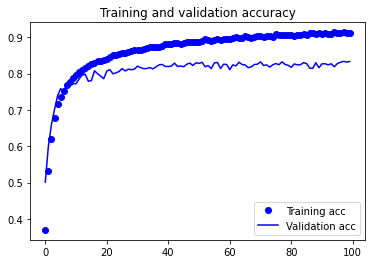

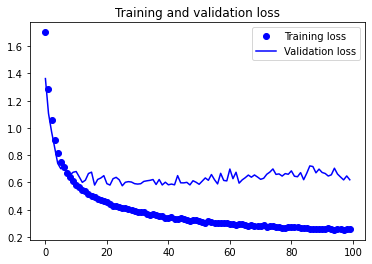

In [13]:
# Adam Optimizer on 4th model, we're going to leave Adam default
# With data augmentation

def load_dataset():
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=0.2)
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  validY = to_categorical(validY)
  return trainX, trainY, testX, testY, validX, validY


def preprocess(train, test, valid):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  valid_norm = valid.astype('float32')
  train_norm /= 255
  test_norm /= 255
  valid_norm /= 255
  return train_norm, test_norm, valid_norm


def define_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


def summarize_diagnostics(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

def aug_data(trainX, trainY, validX, validY, testX, testY):
  train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
  validation_datagen = ImageDataGenerator()
  train = train_datagen.flow(trainX, trainY, batch_size=50)
  validation = validation_datagen.flow(validX, validY, batch_size=50)
  test = validation_datagen.flow(testX, testY, batch_size=50)
  train_steps = int(trainX.shape[0] / 50)
  valid_steps = int(validX.shape[0] / 50)
  return train, validation, train_steps, valid_steps, test


def run_model():
  trainX, trainY, testX, testY, validX, validY = load_dataset()
  trainX, testX, validX = preprocess(trainX, testX, validX)
  model = define_model()
  train_batch, validation_batch, train_steps, valid_steps, test_batch = aug_data(trainX, trainY, validX, validY, testX, testY)
  history = model.fit(train_batch, steps_per_epoch=train_steps, validation_data=validation_batch, validation_steps=valid_steps, epochs=100)
  test_acc = model.evaluate(test_batch)
  print('> %.3f' % (test_acc[1] * 100.0))
  summarize_diagnostics(history)


run_model()

## So we got an 82.56% accuracy!

Major improvemet! This has been the best result so far, and that's without dropout because I was to excited to run it. As we can see, the overfitting is less, and more stable. I think we can still improve the accuracy and reduce the overfitting.

This took forever, so I'm going to changing the epochs to 50. I also forgot to add the Dropout layer, so I'll run it again this time with Dropout. In order to use augmentation, I had to split up the training data with 
``` train_test_split ```.
I changed up the code in order to use data augmentation.

Epoch 1/50
800/800 [==============================] - 22s 27ms/step - loss: 1.9523 - accuracy: 0.2707 - val_loss: 1.4565 - val_accuracy: 0.4773
Epoch 2/50
800/800 [==============================] - 21s 26ms/step - loss: 1.4256 - accuracy: 0.4837 - val_loss: 1.1277 - val_accuracy: 0.5972
Epoch 3/50
800/800 [==============================] - 21s 26ms/step - loss: 1.2145 - accuracy: 0.5630 - val_loss: 1.0008 - val_accuracy: 0.6492
Epoch 4/50
800/800 [==============================] - 21s 26ms/step - loss: 1.0848 - accuracy: 0.6137 - val_loss: 0.9392 - val_accuracy: 0.6675
Epoch 5/50
800/800 [==============================] - 21s 26ms/step - loss: 0.9954 - accuracy: 0.6498 - val_loss: 0.8385 - val_accuracy: 0.7029
Epoch 6/50
800/800 [==============================] - 21s 26ms/step - loss: 0.9436 - accuracy: 0.6663 - val_loss: 0.8590 - val_accuracy: 0.7014
Epoch 7/50
800/800 [==============================] - 21s 26ms/step - loss: 0.8964 - accuracy: 0.6860 - val_loss: 0.8259 - val_accuracy:

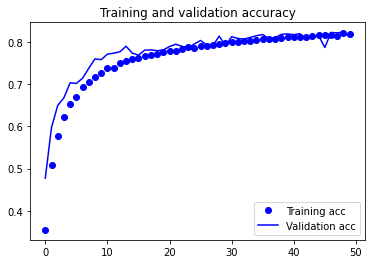

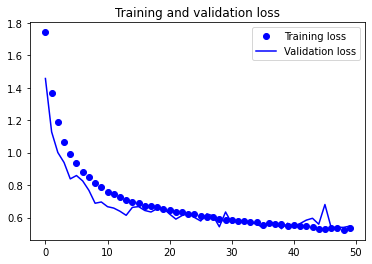

In [14]:
# Adam Optimizer on 4th model, we're going to leave Adam default
# With data augmentation and dropout

def load_dataset():
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=0.2)
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  validY = to_categorical(validY)
  return trainX, trainY, testX, testY, validX, validY


def preprocess(train, test, valid):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  valid_norm = valid.astype('float32')
  train_norm /= 255
  test_norm /= 255
  valid_norm /= 255
  return train_norm, test_norm, valid_norm


def define_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


def summarize_diagnostics(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

def aug_data(trainX, trainY, validX, validY, testX, testY):
  train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
  validation_datagen = ImageDataGenerator()
  train = train_datagen.flow(trainX, trainY, batch_size=50)
  validation = validation_datagen.flow(validX, validY, batch_size=50)
  test = validation_datagen.flow(testX, testY, batch_size=50)
  train_steps = int(trainX.shape[0] / 50)
  valid_steps = int(validX.shape[0] / 50)
  return train, validation, train_steps, valid_steps, test


def run_model():
  trainX, trainY, testX, testY, validX, validY = load_dataset()
  trainX, testX, validX = preprocess(trainX, testX, validX)
  model = define_model()
  train_batch, validation_batch, train_steps, valid_steps, test_batch = aug_data(trainX, trainY, validX, validY, testX, testY)
  history = model.fit(train_batch, steps_per_epoch=train_steps, validation_data=validation_batch, validation_steps=valid_steps, epochs=50)
  test_acc = model.evaluate(test_batch)
  print('> %.3f' % (test_acc[1] * 100.0))
  summarize_diagnostics(history)


run_model()

Epoch 1/60
800/800 [==============================] - 23s 27ms/step - loss: 2.1893 - accuracy: 0.2988 - val_loss: 1.4382 - val_accuracy: 0.4998
Epoch 2/60
800/800 [==============================] - 22s 27ms/step - loss: 1.3411 - accuracy: 0.5182 - val_loss: 1.1731 - val_accuracy: 0.5908
Epoch 3/60
800/800 [==============================] - 21s 27ms/step - loss: 1.1202 - accuracy: 0.6036 - val_loss: 0.8889 - val_accuracy: 0.6858
Epoch 4/60
800/800 [==============================] - 22s 27ms/step - loss: 0.9843 - accuracy: 0.6579 - val_loss: 1.0428 - val_accuracy: 0.6513
Epoch 5/60
800/800 [==============================] - 22s 27ms/step - loss: 0.9243 - accuracy: 0.6795 - val_loss: 0.8524 - val_accuracy: 0.7063
Epoch 6/60
800/800 [==============================] - 22s 27ms/step - loss: 0.8560 - accuracy: 0.7024 - val_loss: 0.8263 - val_accuracy: 0.7123
Epoch 7/60
800/800 [==============================] - 22s 27ms/step - loss: 0.8007 - accuracy: 0.7268 - val_loss: 0.9060 - val_accuracy:

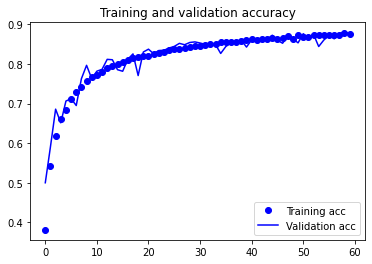

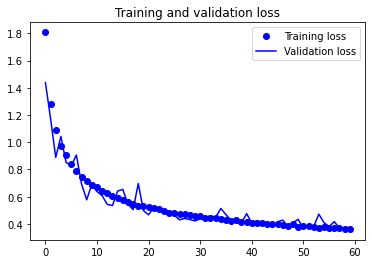

In [15]:
# Adam Optimizer on 4th model, we're going to leave Adam default
# With data augmentation and dropout

def load_dataset():
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=0.2)
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  validY = to_categorical(validY)
  return trainX, trainY, testX, testY, validX, validY


def preprocess(train, test, valid):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  valid_norm = valid.astype('float32')
  train_norm /= 255
  test_norm /= 255
  valid_norm /= 255
  return train_norm, test_norm, valid_norm


def define_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


def summarize_diagnostics(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

def aug_data(trainX, trainY, validX, validY, testX, testY):
  train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
  validation_datagen = ImageDataGenerator()
  train = train_datagen.flow(trainX, trainY, batch_size=50)
  validation = validation_datagen.flow(validX, validY, batch_size=50)
  test = validation_datagen.flow(testX, testY, batch_size=50)
  train_steps = int(trainX.shape[0] / 50)
  valid_steps = int(validX.shape[0] / 50)
  return train, validation, train_steps, valid_steps, test


def run_model():
  trainX, trainY, testX, testY, validX, validY = load_dataset()
  trainX, testX, validX = preprocess(trainX, testX, validX)
  model = define_model()
  train_batch, validation_batch, train_steps, valid_steps, test_batch = aug_data(trainX, trainY, validX, validY, testX, testY)
  history = model.fit(train_batch, steps_per_epoch=train_steps, validation_data=validation_batch, validation_steps=valid_steps, epochs=60)
  test_acc = model.evaluate(test_batch)
  print('> %.3f' % (test_acc[1] * 100.0))
  summarize_diagnostics(history)


run_model()

# Explanation

So, for the one that I addedd the dropout layers, it actually did worse, it got 81.61%. That was probably due to the reduction of epochs. Also, adding the dropout layers made a huge reduction in the overfitting.

For the second one(the one right above), I decided to add 
```Batch Normalization``` 
which stabalizes the learning process, it's another way to solve overfitting. I also had to increment the dropout so it increases every time.

Most of these techniques were pulled from labs done in this class. Other techniques were pulled from doing research like how to reduce overfitting. Top results for overfitting were data augmentation, bach_normalization, and dropout. I used there default settings because I didn't exactly know what to change, except for the dropout, where it said that it'd help if it had an increasing pattern. I also used the
``` Adam ``` 
optimizer which was not learned in class. I used it because it performed the best, and that was only from its default settings. There were other optimizers that I could've chose but this one seemed to work perfectly. Also, I couldn't find the other optimizers that I had read about in the keras api.

For this one, we got an accuracy of **87.28%** with no overfitting. This is awesome. However, I realized that the model kept learning, so I will bump it back up to 100 epochs, even though it's going to take a while



Epoch 1/100
800/800 [==============================] - 23s 28ms/step - loss: 2.1572 - accuracy: 0.3065 - val_loss: 1.3134 - val_accuracy: 0.5265
Epoch 2/100
800/800 [==============================] - 21s 27ms/step - loss: 1.3074 - accuracy: 0.5309 - val_loss: 1.1305 - val_accuracy: 0.6092
Epoch 3/100
800/800 [==============================] - 22s 27ms/step - loss: 1.1040 - accuracy: 0.6110 - val_loss: 0.8372 - val_accuracy: 0.7009
Epoch 4/100
800/800 [==============================] - 22s 27ms/step - loss: 0.9834 - accuracy: 0.6578 - val_loss: 0.7930 - val_accuracy: 0.7204
Epoch 5/100
800/800 [==============================] - 21s 27ms/step - loss: 0.9165 - accuracy: 0.6809 - val_loss: 0.8113 - val_accuracy: 0.7141
Epoch 6/100
800/800 [==============================] - 22s 27ms/step - loss: 0.8257 - accuracy: 0.7137 - val_loss: 0.8053 - val_accuracy: 0.7259
Epoch 7/100
800/800 [==============================] - 22s 27ms/step - loss: 0.7968 - accuracy: 0.7260 - val_loss: 0.8048 - val_ac

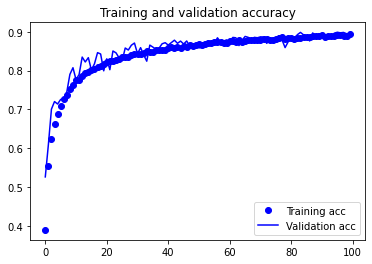

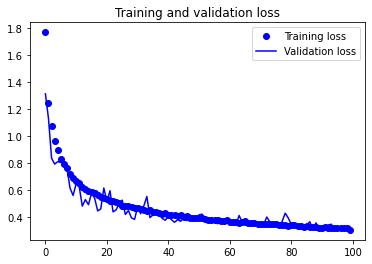

In [16]:
# Adam Optimizer on 4th model, we're going to leave Adam default
# With data augmentation and dropout

def load_dataset():
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=0.2)
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  validY = to_categorical(validY)
  return trainX, trainY, testX, testY, validX, validY


def preprocess(train, test, valid):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  valid_norm = valid.astype('float32')
  train_norm /= 255
  test_norm /= 255
  valid_norm /= 255
  return train_norm, test_norm, valid_norm


def define_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


def summarize_diagnostics(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

def aug_data(trainX, trainY, validX, validY, testX, testY):
  train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
  validation_datagen = ImageDataGenerator()
  train = train_datagen.flow(trainX, trainY, batch_size=50)
  validation = validation_datagen.flow(validX, validY, batch_size=50)
  test = validation_datagen.flow(testX, testY, batch_size=50)
  train_steps = int(trainX.shape[0] / 50)
  valid_steps = int(validX.shape[0] / 50)
  return train, validation, train_steps, valid_steps, test


def run_model():
  trainX, trainY, testX, testY, validX, validY = load_dataset()
  trainX, testX, validX = preprocess(trainX, testX, validX)
  model = define_model()
  train_batch, validation_batch, train_steps, valid_steps, test_batch = aug_data(trainX, trainY, validX, validY, testX, testY)
  history = model.fit(train_batch, steps_per_epoch=train_steps, validation_data=validation_batch, validation_steps=valid_steps, epochs=100)
  test_acc = model.evaluate(test_batch)
  print('> %.3f' % (test_acc[1] * 100.0))
  summarize_diagnostics(history)


run_model()

## 88.32% accuracy!

I'm fascinated by the results. However, I feel like we can still get a better accuracy. I will bump it up to 200 epochs, and this will be my final result. Hopefully, we got to a 90!

I read about learning rates, and other regularizers but that will be out of the scope of this project. So I will just leave it as it is. Maybe I'll mess around with those in my free time.

Epoch 1/200
800/800 [==============================] - 23s 28ms/step - loss: 2.2059 - accuracy: 0.2966 - val_loss: 1.3206 - val_accuracy: 0.5306
Epoch 2/200
800/800 [==============================] - 22s 27ms/step - loss: 1.3344 - accuracy: 0.5195 - val_loss: 1.1444 - val_accuracy: 0.5919
Epoch 3/200
800/800 [==============================] - 22s 27ms/step - loss: 1.1067 - accuracy: 0.6095 - val_loss: 0.9324 - val_accuracy: 0.6718
Epoch 4/200
800/800 [==============================] - 22s 27ms/step - loss: 0.9923 - accuracy: 0.6506 - val_loss: 0.8398 - val_accuracy: 0.7037
Epoch 5/200
800/800 [==============================] - 22s 27ms/step - loss: 0.9020 - accuracy: 0.6846 - val_loss: 0.8164 - val_accuracy: 0.7091
Epoch 6/200
800/800 [==============================] - 22s 28ms/step - loss: 0.8384 - accuracy: 0.7103 - val_loss: 0.8595 - val_accuracy: 0.7103
Epoch 7/200
800/800 [==============================] - 22s 27ms/step - loss: 0.7870 - accuracy: 0.7304 - val_loss: 0.6905 - val_ac

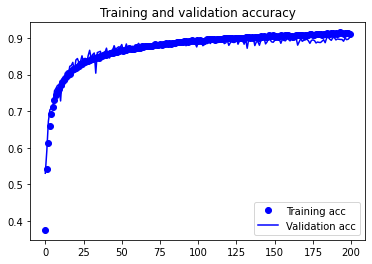

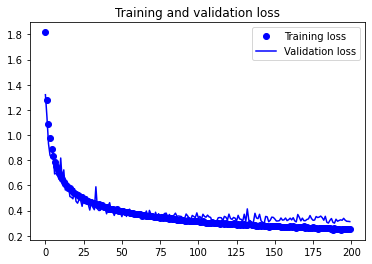

In [17]:
# Adam Optimizer on 4th model, we're going to leave Adam default
# With data augmentation and dropout

def load_dataset():
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=0.2)
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  validY = to_categorical(validY)
  return trainX, trainY, testX, testY, validX, validY


def preprocess(train, test, valid):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  valid_norm = valid.astype('float32')
  train_norm /= 255
  test_norm /= 255
  valid_norm /= 255
  return train_norm, test_norm, valid_norm


def define_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


def summarize_diagnostics(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

def aug_data(trainX, trainY, validX, validY, testX, testY):
  train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
  validation_datagen = ImageDataGenerator()
  train = train_datagen.flow(trainX, trainY, batch_size=50)
  validation = validation_datagen.flow(validX, validY, batch_size=50)
  test = validation_datagen.flow(testX, testY, batch_size=50)
  train_steps = int(trainX.shape[0] / 50)
  valid_steps = int(validX.shape[0] / 50)
  return train, validation, train_steps, valid_steps, test


def run_model():
  trainX, trainY, testX, testY, validX, validY = load_dataset()
  trainX, testX, validX = preprocess(trainX, testX, validX)
  model = define_model()
  train_batch, validation_batch, train_steps, valid_steps, test_batch = aug_data(trainX, trainY, validX, validY, testX, testY)
  history = model.fit(train_batch, steps_per_epoch=train_steps, validation_data=validation_batch, validation_steps=valid_steps, epochs=200)
  test_acc = model.evaluate(test_batch)
  print('> %.3f' % (test_acc[1] * 100.0))
  summarize_diagnostics(history)


run_model()

#89.48% accuracy! boom!

I'm satisfied with the result. Though, it started to overfit a bit towards the end. It got to 90% a few times for the validation accuracy, so I was hoping for 90% on the test data. I also said I was going to save the model but I forgot.

I really enjoyed working on this project, I put a lot of effort and did a lot research. My first model I did had around the 50s for accuracy, but it was because I was doing it wrong. So, the first one started at the 72 mark, and then went to 76s mark, and then 80s, and 85s and now 90s. I think the model can still improve if other things like the ones I mentioned earlier would get tweaked.